## Yelp API

In [3]:
from yelp_helpers import *
from yelp import *

In [117]:
url_params = {'categories': 'japanese'
    
}

In [290]:
test = city_search('Chandler')

Querying https://api.yelp.com/v3/businesses/search ...


In [291]:
test

{'businesses': [{'id': 'ujgpePdD8Q-fP1mPFnw0Qw',
   'alias': 'peixoto-coffee-chandler-2',
   'name': 'Peixoto Coffee',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/EQg2GErx3TztENWkYLhnWw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/peixoto-coffee-chandler-2?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 495,
   'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'},
    {'alias': 'coffeeroasteries', 'title': 'Coffee Roasteries'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.301900334904,
    'longitude': -111.841690018773},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '11 W Boston Suite',
    'address2': '',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['11 W Boston Suite', 'Chandler, AZ 85225']},
   'phone': '+14802752843',
 

In [4]:
key = load_api_key()
API_KEY = key['client_secret']

In [5]:
def request(host, path, api_key, url_params=None):
    """Given an api_key, send a GET request to the API.

    Parameters
    ----------
    host : str
        The domain host of the API.
    path : str
        The path of the API after the domain.
    api_key: str
        client_secret.
    url_params : dict
        An optional set of query parameters in the request.

    Returns
    -------
    dict
        The JSON response from the request.

    Raises
    ------
    HTTPError
        An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

In [6]:
import requests

In [301]:
# pandas set_option to display full text
pd.set_option('display.max_colwidth', -1)


In [316]:
host = 'https://api.yelp.com'
path = '/v3/businesses/search'
api_key = key['client_secret']
url_params = {'categories': "Fast Food",
              'location': 'Chandler',
              'limit': 50
             }

In [317]:
tt = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [326]:
df = pd.DataFrame(tt['businesses'])
df[['name','categories']].sample(5)

,name,categories
9,Pho Chandler,"[{'alias': 'vietnamese', 'title': 'Vietnamese'}, {'alias': 'chinese', 'title': 'Chinese'}, {'alias': 'noodles', 'title': 'Noodles'}]"
18,Snowtime,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'shavedice', 'title': 'Shaved Ice'}]"
38,The Greeks Grill,"[{'alias': 'greek', 'title': 'Greek'}, {'alias': 'mediterranean', 'title': 'Mediterranean'}]"
30,Nishikawa Ramen,"[{'alias': 'ramen', 'title': 'Ramen'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}, {'alias': 'tapas', 'title': 'Tapas Bars'}]"
45,Cheddar's Scratch Kitchen,"[{'alias': 'comfortfood', 'title': 'Comfort Food'}, {'alias': 'tradamerican', 'title': 'American (Traditional)'}]"


In [321]:
url_params = {'categories': "hotdogs",
              'location': 'Chandler',
              'limit': 50
             }

In [312]:
tt = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [315]:
df = pd.DataFrame(tt['businesses'])
df[['name','categories']].sample(5)

,name,categories
5,MOD Pizza,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'hotdogs', 'title': 'Fast Food'}]"
27,Subway,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}]"
24,Jimmy John's,"[{'alias': 'sandwiches', 'title': 'Sandwiches'}, {'alias': 'delis', 'title': 'Delis'}, {'alias': 'hotdogs', 'title': 'Fast Food'}]"
46,Raising Cane's,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {'alias': 'chickenshop', 'title': 'Chicken Shop'}]"
21,In-N-Out Burger,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {'alias': 'burgers', 'title': 'Burgers'}]"


In [328]:
# pandas reset_option to default
pd.reset_option('display.max_colwidth')

In [329]:
df = pd.DataFrame(tt['businesses'])
df[['name','categories']].sample(5)

,name,categories
13,China Magic Noodle House,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a..."
26,Lee's Sandwiches,"[{'alias': 'sandwiches', 'title': 'Sandwiches'..."
19,Bella Gusto Urban Pizzeria,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias..."
8,Pokitrition - Sushi Burritos & Poke,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'..."
44,Downtown Chandler Café and Bakery,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias..."


In [12]:
search_offset = 0
search_limit = 50
total = tt['total']

In [25]:
for i in range(int(total/search_limit)):
    search_offset += search_limit
    url_params = {'categories': "chinese",
              'location': 'Chandler',
              'offset': search_offset,
              'limit': search_limit
             }
    tt['businesses'] += request(host, path, api_key, url_params)['businesses']

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...


In [33]:
tt

{'businesses': [{'id': 'bWucOPNoIjd8ECdiDyVq9Q',
   'alias': 'singing-pandas-asian-restaurant-and-bar-chandler',
   'name': 'Singing Pandas Asian Restaurant & Bar',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/gPuj6-DKU1MdglAPznGgGw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/singing-pandas-asian-restaurant-and-bar-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 399,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'chinese', 'title': 'Chinese'},
    {'alias': 'asianfusion', 'title': 'Asian Fusion'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.3058, 'longitude': -111.82871},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '757 E Chandler Blvd',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_addre

In [271]:
search_offset = 0
search_limit = 50
url_params = {'categories': "restaurants",
              'location': 'Las Vegas',
              'limit': search_limit,
              'offset': search_offset
             }

In [272]:
tt1 = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [273]:
loc = 'Las Vegas'
total = min(tt1['total'], 950)
if total > 50:
    for i in range(int(total/search_limit)):
        search_offset += search_limit
        url_params = {'categories': "restaurants",
                  'location': loc,
                  'offset': search_offset,
                  'limit': search_limit
                 }
        tt1['businesses'] += request(host, path, api_key, url_params)['businesses']

Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying https://api.yelp.com/v3/businesses/search ...
Querying h

In [274]:
len(tt1['businesses'])

1000

In [275]:
tt1['businesses'][0:10]

[{'id': '4JNXUYY8wbaaDmk3BPzlWw',
  'alias': 'mon-ami-gabi-las-vegas-2',
  'name': 'Mon Ami Gabi',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/infUdLdU8Lm-OPaopoadRg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/mon-ami-gabi-las-vegas-2?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
  'review_count': 8186,
  'categories': [{'alias': 'french', 'title': 'French'},
   {'alias': 'steak', 'title': 'Steakhouses'},
   {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
  'rating': 4.0,
  'coordinates': {'latitude': 36.112859, 'longitude': -115.172434},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '3655 Las Vegas Blvd S',
   'address2': '',
   'address3': '',
   'city': 'Las Vegas',
   'zip_code': '89109',
   'country': 'US',
   'state': 'NV',
   'display_address': ['3655 Las Vegas Blvd S', 'Las Vegas, NV 89109']},
  'phone': '+17029444224',
  'd

In [51]:
import pandas as pd

In [ ]:
columns=['categories', 'display_phone', 'id', 'image_url', 'name', 'location', 'rating', 'review_count']

In [59]:
df = pd.DataFrame(tt1['businesses'])

In [60]:
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,little-miss-bbq-phoenix-2,"[{'alias': 'bbq', 'title': 'Barbeque'}]","{'latitude': 33.4218771340634, 'longitude': -1...",(602) 437-1177,7928.626705,Xg5qEQiB-7L6kGJ5F4K3bQ,https://s3-media1.fl.yelpcdn.com/bphoto/Z0boK4...,False,"{'address1': '4301 E University Dr', 'address2...",Little Miss BBQ,+16024371177,$$,5.0,1807,[],https://www.yelp.com/biz/little-miss-bbq-phoen...
1,cibo-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.45496, 'longitude': -112.079908}",(602) 441-2697,1427.893225,9a3DrZvpYxVs3k_qwlCNSw,https://s3-media4.fl.yelpcdn.com/bphoto/6FHzrs...,False,"{'address1': '603 N 5th Ave', 'address2': None...",Cibo,+16024412697,$$,4.5,1892,[pickup],https://www.yelp.com/biz/cibo-phoenix?adjust_c...
2,lux-central-phoenix-2,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...","{'latitude': 33.5005972575259, 'longitude': -1...",(602) 327-1396,6191.147233,OgJ0KxwJcJ9R5bUK0ixCbg,https://s3-media4.fl.yelpcdn.com/bphoto/zbqPnk...,False,"{'address1': '4400 N Central Ave', 'address2':...",Lux Central,+16023271396,$$,4.5,1948,[],https://www.yelp.com/biz/lux-central-phoenix-2...
3,harumi-sushi-phoenix,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 33.4497491809777, 'longitude': -1...",(602) 258-0131,711.602175,S-oLPRdhlyL5HAknBKTUcQ,https://s3-media1.fl.yelpcdn.com/bphoto/0elcfr...,False,"{'address1': '114 W Adams St', 'address2': 'St...",Harumi Sushi,+16022580131,$$,4.5,1058,[],https://www.yelp.com/biz/harumi-sushi-phoenix?...
4,la-santisima-phoenix,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 33.4692, 'longitude': -112.04739}",(602) 254-6330,3419.587107,frCxZS7lPhEnQRJ3UY6m7A,https://s3-media1.fl.yelpcdn.com/bphoto/S_dlB8...,False,"{'address1': '1919 N 16th St', 'address2': '',...",La Santisima,+16022546330,$$,4.0,1908,[pickup],https://www.yelp.com/biz/la-santisima-phoenix?...
5,welcome-diner-phoenix,"[{'alias': 'diners', 'title': 'Diners'}]","{'latitude': 33.45553, 'longitude': -112.06071}",(602) 495-1111,1460.724694,cTZmf7B-4yciMc1WKiCVOA,https://s3-media2.fl.yelpcdn.com/bphoto/bwpAzO...,False,"{'address1': '929 E Pierce St', 'address2': ''...",Welcome Diner,+16024951111,$$,4.5,865,[],https://www.yelp.com/biz/welcome-diner-phoenix...
6,postino-arcadia-phoenix,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 33.5021667480469, 'longitude': -1...",(602) 852-3939,9346.153686,u-SJ5QUwrNquL9VnXwl8cg,https://s3-media2.fl.yelpcdn.com/bphoto/h2Nf26...,False,"{'address1': '3939 E Campbell Ave', 'address2'...",Postino Arcadia,+16028523939,$$,4.5,1239,[],https://www.yelp.com/biz/postino-arcadia-phoen...
7,pizzeria-bianco-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.4492351, 'longitude': -112.065...",(602) 258-8300,622.847464,pSQFynH1VxkfSmehRXlZWw,https://s3-media1.fl.yelpcdn.com/bphoto/N1m6xP...,False,"{'address1': '623 E Adams St', 'address2': '',...",Pizzeria Bianco,+16022588300,$$,4.0,2218,[],https://www.yelp.com/biz/pizzeria-bianco-phoen...
8,matts-big-breakfast-phoenix-2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 33.4574481512938, 'longitude': -1...",(602) 254-1074,1395.761877,L2p0vO3fsS2LC6hhQo3CzA,https://s3-media4.fl.yelpcdn.com/bphoto/_lEdrS...,False,"{'address1': '825 N 1st St', 'address2': '', '...",Matt's Big Breakfast,+16022541074,$$,4.0,1741,[],https://www.yelp.com/biz/matts-big-breakfast-p...
9,postino-central-phoenix,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 33.51268, 'longitude': -112.07414}",(602) 274-5144,7529.886872,FogTa-wmjhVnJCoTiaxvZA,https://s3-media2.fl.yelpcdn.com/bphoto/KAF973...,False,"{'address1': '5144 N Central Ave', 'address2':...",Postino Central,+16022745144,$$,4.5,1017,[],https://www.yelp.com/biz/postino-central-phoen...


In [61]:
cat_words_dict = {'Restaurants': 6,
 'Breakfast & Brunch': 3,
 'Burgers': 3,
 'Mexican': 2,
 'American (Traditional)': 2,
 'Seafood': 2,
 'Szechuan': 1,
 'Asian Fusion': 1,
 'Chinese': 1,
 'Mediterranean': 1,
 'Cafes': 1,
 'Italian': 1,
 'Pizza': 1,
 'Food': 1,
 'American (New)': 1,
 'Comfort Food': 1,
 'Beer': 1,
 'Wine & Spirits': 1,
 'Vegetarian': 1}

In [62]:
cat_words_dict

{'Restaurants': 6,
 'Breakfast & Brunch': 3,
 'Burgers': 3,
 'Mexican': 2,
 'American (Traditional)': 2,
 'Seafood': 2,
 'Szechuan': 1,
 'Asian Fusion': 1,
 'Chinese': 1,
 'Mediterranean': 1,
 'Cafes': 1,
 'Italian': 1,
 'Pizza': 1,
 'Food': 1,
 'American (New)': 1,
 'Comfort Food': 1,
 'Beer': 1,
 'Wine & Spirits': 1,
 'Vegetarian': 1}

In [69]:
cat_words_dict.keys()

dict_keys(['Restaurants', 'Breakfast & Brunch', 'Burgers', 'Mexican', 'American (Traditional)', 'Seafood', 'Szechuan', 'Asian Fusion', 'Chinese', 'Mediterranean', 'Cafes', 'Italian', 'Pizza', 'Food', 'American (New)', 'Comfort Food', 'Beer', 'Wine & Spirits', 'Vegetarian'])

In [70]:
# get the nth key from dict
list(cat_words_dict)[1]

'Breakfast & Brunch'

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
alias            1000 non-null object
categories       1000 non-null object
coordinates      1000 non-null object
display_phone    1000 non-null object
distance         1000 non-null float64
id               1000 non-null object
image_url        1000 non-null object
is_closed        1000 non-null bool
location         1000 non-null object
name             1000 non-null object
phone            1000 non-null object
price            983 non-null object
rating           1000 non-null float64
review_count     1000 non-null int64
transactions     1000 non-null object
url              1000 non-null object
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 118.2+ KB


In [84]:
type(df.categories[0][0])

dict

In [89]:
df.categories[6]

[{'alias': 'wine_bars', 'title': 'Wine Bars'},
 {'alias': 'italian', 'title': 'Italian'},
 {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}]

In [137]:
for i in range(0, 20):
    print(df.categories[i])

[{'alias': 'bbq', 'title': 'Barbeque'}]
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}]
[{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bakeries', 'title': 'Bakeries'}]
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'sushi', 'title': 'Sushi Bars'}, {'alias': 'seafood', 'title': 'Seafood'}]
[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'seafood', 'title': 'Seafood'}]
[{'alias': 'diners', 'title': 'Diners'}]
[{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}]
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'salad', 'title': 'Salad'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]
[{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}]
[{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'italian', 'title': 'I

In [139]:
index = []
for i in range(len(df)):
    a = df.categories[i]
    if any(d['title'] == 'American (New)' for d in a):
        #print(i, 'Yes')
        index.append(i)

In [210]:
# top 2 category words besides restaurants
# list(cat_words_dict)[1], list(cat_words_dict)[2]
index = []
for i in range(len(df)):
    a = df.categories[i]
    if any((d['title'] == list(cat_words_dict)[1]) for d in a) and \
       any((d['title'] == list(cat_words_dict)[2]) for d in a):
        #print(i, 'Yes')
        index.append(i)


In [211]:
index

[63, 73, 363, 560, 627, 653, 795, 814, 855, 912, 939, 961, 981, 988]

In [171]:
df1 = df.iloc[index]

In [174]:
df1[df1.rating > 3.5]

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
63,switch-restaurant-and-bar-phoenix-2,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...","{'latitude': 33.477031, 'longitude': -112.073616}",(602) 264-2295,3573.551683,-Ht7HiGBox8lS1Y8IPjO8g,https://s3-media2.fl.yelpcdn.com/bphoto/x2wqOD...,False,"{'address1': '2603 N Central Ave', 'address2':...",Switch Restaurant & Bar,+16022642295,$$,4.0,791,"[delivery, pickup]",https://www.yelp.com/biz/switch-restaurant-and...
73,ingos-tasty-food-phoenix,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.502758, 'longitude': -111.995651}",(602) 795-2884,9432.672727,mUVAMNN7BCQ9HGA9w_7C1g,https://s3-media2.fl.yelpcdn.com/bphoto/LpM2-T...,False,"{'address1': '4502 N 40th St', 'address2': '',...",Ingo's Tasty Food,+16027952884,$$,4.5,457,[],https://www.yelp.com/biz/ingos-tasty-food-phoe...
363,biscuits-phoenix,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 33.3483620083825, 'longitude': -1...",(480) 209-1850,13404.125017,oi6mahpAmEuikfihFVDmCw,https://s3-media3.fl.yelpcdn.com/bphoto/foWf6N...,False,"{'address1': '4623 E Elliott Rd', 'address2': ...",Biscuits,+14802091850,$$,4.0,256,[],https://www.yelp.com/biz/biscuits-phoenix?adju...
653,harlows-cafe-tempe,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.4216499328613, 'longitude': -1...",(480) 829-9444,11167.707307,Rj3wnYT1QAxpJlRT5mMc-g,https://s3-media3.fl.yelpcdn.com/bphoto/gY4aY-...,False,"{'address1': '1021 W University Dr', 'address2...",Harlow's Cafe,+14808299444,$$,4.0,462,[],https://www.yelp.com/biz/harlows-cafe-tempe?ad...
814,pochos-phoenix-2,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 33.4668144026451, 'longitude': -1...",(602) 225-2925,4453.760544,D7-T6DRpjApGNBQZ3Hq-fQ,https://s3-media1.fl.yelpcdn.com/bphoto/1Ing9-...,False,"{'address1': '1627 North 24th St', 'address2':...",Pocho's,+16022252925,$,4.5,14,[],https://www.yelp.com/biz/pochos-phoenix-2?adju...
855,cafe-1010-phoenix,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 33.4481931, 'longitude': -112.086...",(602) 253-5500,1513.780585,0zr7FB0nnZXJmwb94yTbJQ,https://s3-media2.fl.yelpcdn.com/bphoto/HUjeF_...,False,"{'address1': '1010 W Washington St', 'address2...",Cafe 1010,+16022535500,$,4.5,7,[],https://www.yelp.com/biz/cafe-1010-phoenix?adj...


In [281]:
cat_words_dict1 = {'Restaurants': 28,
 'Breakfast & Brunch': 8,
 'Nightlife': 8,
 'Bars': 8,
 'American (New)': 7,
 'Mexican': 7,
 'Food': 5,
 'Cafes': 4,
 'Sandwiches': 4,
 'Gastropubs': 4,
 'Pizza': 3,
 'Donuts': 3,
 'Chicken Wings': 3,
 'Seafood': 3,
 'Cocktail Bars': 3,
 'Pubs': 2,
 'Asian Fusion': 2,
 'Italian': 2,
 'Event Planning & Services': 2,
 'New Mexican Cuisine': 2,
 'Farmers Market': 1,
 'Food Trucks': 1,
 'Wine Bars': 1,
 'Burgers': 1,
 'Beer Gardens': 1,
 'Chicken Shop': 1,
 'Coffee & Tea': 1,
 'Southern': 1,
 'Soul Food': 1,
 'Waffles': 1,
 'Bagels': 1,
 'Lounges': 1,
 'Caribbean': 1,
 'Tex-Mex': 1,
 'Steakhouses': 1,
 'Caterers': 1,
 'Party & Event Planning': 1,
 'Hot Dogs': 1,
 'Sushi Bars': 1,
 'Chinese': 1,
 'Thai': 1,
 'Desserts': 1,
 'Venues & Event Spaces': 1,
 'Salad': 1,
 'Irish Pub': 1,
 'Irish': 1,
 'Vegan': 1,
 'Vegetarian': 1,
 'Sports Bars': 1}

In [284]:
# top 3 category words besides restaurants
# list(cat_words_dict)[1], list(cat_words_dict)[2]
# use or instead of and logic for the top 3 category words?
index1 = []
for i in range(len(df)):
    a = df.categories[i]
    if any((d['title'] == list(cat_words_dict1)[1]) for d in a) and \
       any((d['title'] == list(cat_words_dict1)[2]) for d in a):
        #print(i, 'Yes')
        index1.append(i)


In [289]:
df2 = df.iloc[index1]
df2

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,address0,address1
0,wimpys-paradise-chandler,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.30291, 'longitude': -111.84253}",(602) 696-4397,4274.284179,2T66oHiIi1Ql-j5IhwbGjw,https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9...,False,"{'address1': '48 S San Marcos Pl', 'address2':...",Wimpy's Paradise,+16026964397,$,4.5,191,"[pickup, delivery]",https://www.yelp.com/biz/wimpys-paradise-chand...,48 S San Marcos Pl,"Chandler, AZ 85225"


In [196]:
df2 = df2[df2.rating > 3.5]

In [206]:
df2.sort_values('rating', ascending=False, inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [207]:
df2

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
332,helpings-cafe-market-and-catering-phoenix,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 33.4512461721897, 'longitude': -1...",(602) 275-2539,5669.219192,E3qxMkbKxQR6Aca36c53GA,https://s3-media1.fl.yelpcdn.com/bphoto/nfnNNy...,False,"{'address1': '3333 E Van Buren St', 'address2'...","Helpings Cafe, Market and Catering",+16022752539,$,5.0,46,[],https://www.yelp.com/biz/helpings-cafe-market-...
693,the-larry-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.44003, 'longitude': -112.06702}",,639.985105,eQtknHB0KrfO1bff68ZWtw,https://s3-media1.fl.yelpcdn.com/bphoto/FO6oMj...,False,"{'address1': '515 E Grant St', 'address2': Non...",The Larry,,NaN,5.0,17,[],https://www.yelp.com/biz/the-larry-phoenix?adj...
207,ny-slicers-deli-phoenix,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.45727, 'longitude': -112.15125}",(602) 442-8000,7628.939305,5OmuCo0kdvWQZXidGuxrsw,https://s3-media3.fl.yelpcdn.com/bphoto/gpUDIr...,False,"{'address1': '835 N 43rd Ave', 'address2': Non...",NY Slicers Deli,+16024428000,$,4.5,147,"[pickup, delivery]",https://www.yelp.com/biz/ny-slicers-deli-phoen...
208,noble-eatery-phoenix,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.5028845, 'longitude': -112.029...",(602) 688-2424,7445.408314,AZQ6eiVqhMalpVL9Bbq6Iw,https://s3-media3.fl.yelpcdn.com/bphoto/yidr5K...,False,"{'address1': '4525 N 24th St', 'address2': Non...",Noble Eatery,+16026882424,$$,4.5,126,[],https://www.yelp.com/biz/noble-eatery-phoenix?...
877,mr-submarine-phoenix-3,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.4876081937112, 'longitude': -1...",(602) 956-6219,6017.913078,1YBpnyR_VlJNjrUzNVXYDQ,https://s3-media1.fl.yelpcdn.com/bphoto/ZnTM5S...,False,"{'address1': '3306 N 24th St', 'address2': '',...",Mr Submarine,+16029566219,$$,4.5,15,[],https://www.yelp.com/biz/mr-submarine-phoenix-...
520,shortys-sandwich-shop-phoenix-3,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 33.40679, 'longitude': -112.00019}",(602) 753-7382,7760.960581,I7HGSg1OfAbO9X-mbDYdxg,https://s3-media3.fl.yelpcdn.com/bphoto/F8jXsd...,False,"{'address1': '3767 E Broadway Rd', 'address2':...",Shorty's Sandwich Shop,+16027537382,$,4.5,49,[],https://www.yelp.com/biz/shortys-sandwich-shop...
77,the-main-ingredient-ale-house-and-café-phoenix-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 33.4745826893249, 'longitude': -1...",(602) 843-6246,3326.504509,MgHWbwuxxb_txhI3lK_bKg,https://s3-media4.fl.yelpcdn.com/bphoto/B7FIeI...,False,"{'address1': '2337 N 7th St', 'address2': '', ...",The Main Ingredient Ale House And Café,+16028436246,$$,4.0,566,[],https://www.yelp.com/biz/the-main-ingredient-a...
513,potbelly-sandwich-shop-phoenix-3,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.466, 'longitude': -112.081829}",(602) 283-3267,2571.521912,rQtQbCcRPyoVR8-Qrti6pA,https://s3-media3.fl.yelpcdn.com/bphoto/8h9XHb...,False,"{'address1': '534 W McDowell Rd', 'address2': ...",Potbelly Sandwich Shop,+16022833267,$,4.0,78,"[delivery, pickup]",https://www.yelp.com/biz/potbelly-sandwich-sho...
726,cheba-hut-tempe,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.422728, 'longitude': -111.951494}",(480) 446-0088,11287.159676,0pMsVlUu_MbFqmvbA8F79Q,https://s3-media2.fl.yelpcdn.com/bphoto/SPBTXu...,False,"{'address1': '960 W University Dr', 'address2'...",Cheba Hut,+14804460088,$,4.0,384,"[delivery, pickup]",https://www.yelp.com/biz/cheba-hut-tempe?adjus...
517,sticklers-phoenix,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.448599, 'longitude': -112.0778...",(602) 254-6700,817.767266,bgBCvYf7wM2HdbzLad897A,https://s3-media3.fl.yelpcdn.com/bphoto/XKOdCG...,False,"{'address1': '30 N 3rd Ave', 'address2': '', '...",Sticklers,+16022546700,$,4.0,72,"[delive

In [277]:
df3 = df2[:5]

In [278]:
df3

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
332,helpings-cafe-market-and-catering-phoenix,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 33.4512461721897, 'longitude': -1...",(602) 275-2539,5669.219192,E3qxMkbKxQR6Aca36c53GA,https://s3-media1.fl.yelpcdn.com/bphoto/nfnNNy...,False,"{'address1': '3333 E Van Buren St', 'address2'...","Helpings Cafe, Market and Catering",+16022752539,$,5.0,46,[],https://www.yelp.com/biz/helpings-cafe-market-...
693,the-larry-phoenix,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 33.44003, 'longitude': -112.06702}",,639.985105,eQtknHB0KrfO1bff68ZWtw,https://s3-media1.fl.yelpcdn.com/bphoto/FO6oMj...,False,"{'address1': '515 E Grant St', 'address2': Non...",The Larry,,NaN,5.0,17,[],https://www.yelp.com/biz/the-larry-phoenix?adj...
207,ny-slicers-deli-phoenix,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.45727, 'longitude': -112.15125}",(602) 442-8000,7628.939305,5OmuCo0kdvWQZXidGuxrsw,https://s3-media3.fl.yelpcdn.com/bphoto/gpUDIr...,False,"{'address1': '835 N 43rd Ave', 'address2': Non...",NY Slicers Deli,+16024428000,$,4.5,147,"[pickup, delivery]",https://www.yelp.com/biz/ny-slicers-deli-phoen...
208,noble-eatery-phoenix,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.5028845, 'longitude': -112.029...",(602) 688-2424,7445.408314,AZQ6eiVqhMalpVL9Bbq6Iw,https://s3-media3.fl.yelpcdn.com/bphoto/yidr5K...,False,"{'address1': '4525 N 24th St', 'address2': Non...",Noble Eatery,+16026882424,$$,4.5,126,[],https://www.yelp.com/biz/noble-eatery-phoenix?...
877,mr-submarine-phoenix-3,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...","{'latitude': 33.4876081937112, 'longitude': -1...",(602) 956-6219,6017.913078,1YBpnyR_VlJNjrUzNVXYDQ,https://s3-media1.fl.yelpcdn.com/bphoto/ZnTM5S...,False,"{'address1': '3306 N 24th St', 'address2': '',...",Mr Submarine,+16029566219,$$,4.5,15,[],https://www.yelp.com/biz/mr-submarine-phoenix-...


In [124]:
search_offset = 0
search_limit = 50
url_params = {'categories': "Steakhouses",
              'location': 'Phoenix',
              'limit': search_limit,
              'offset': search_offset
             }

In [125]:
tt2 = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [126]:
df2 = pd.DataFrame(tt2['businesses'])

In [127]:
for i in range(10):
    print(df2.categories[i])

[{'alias': 'bbq', 'title': 'Barbeque'}]
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}]
[{'alias': 'coffee', 'title': 'Coffee & Tea'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bakeries', 'title': 'Bakeries'}]
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'sushi', 'title': 'Sushi Bars'}, {'alias': 'seafood', 'title': 'Seafood'}]
[{'alias': 'mexican', 'title': 'Mexican'}, {'alias': 'seafood', 'title': 'Seafood'}]
[{'alias': 'diners', 'title': 'Diners'}]
[{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'italian', 'title': 'Italian'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}]
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'salad', 'title': 'Salad'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]
[{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}]
[{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'italian', 'title': 'I

In [129]:
url_params = {'categories': "'title': 'American (New)'",
              'location': 'Chandler',
              'limit': 50
             }

In [130]:
tt3 = request(host, path, api_key, url_params)
df3 = pd.DataFrame(tt3['businesses'])

Querying https://api.yelp.com/v3/businesses/search ...


In [134]:
df3.categories[2]

[{'alias': 'indpak', 'title': 'Indian'},
 {'alias': 'halal', 'title': 'Halal'},
 {'alias': 'buffets', 'title': 'Buffets'}]

In [22]:
tt3['businesses'] = tt1['businesses'] + tt2['businesses']

In [23]:
tt3

{'businesses': [{'id': '2T66oHiIi1Ql-j5IhwbGjw',
   'alias': 'wimpys-paradise-chandler',
   'name': "Wimpy's Paradise",
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9MSL6WEYg3a-EZDvQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/wimpys-paradise-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 191,
   'categories': [{'alias': 'burgers', 'title': 'Burgers'},
    {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'},
    {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.30291, 'longitude': -111.84253},
   'transactions': ['pickup', 'delivery'],
   'price': '$',
   'location': {'address1': '48 S San Marcos Pl',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['48 S Sa

In [83]:
(tt['businesses'][0]).keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'price', 'location', 'phone', 'display_phone', 'distance'])

In [84]:
b0 = tt['businesses'][0]

In [85]:
b0['name'], b0['location']['display_address'], b0['display_phone']

('Singing Pandas Asian Restaurant & Bar',
 ['757 E Chandler Blvd', 'Chandler, AZ 85225'],
 '(480) 777-5050')

In [87]:
print(b0['name'])

Singing Pandas Asian Restaurant & Bar


In [90]:
for v in b0['location']['display_address']:
    print(v)

757 E Chandler Blvd
Chandler, AZ 85225


In [91]:
for v in tt['businesses'][2]['location']['display_address']:
    print(v)

2015 N Dobson Rd
Ste 2
Chandler, AZ 85224


In [214]:
from IPython.display import Image

In [228]:
tt2['businesses'][3]['location']['display_address']

['114 W Adams St', 'Ste C101', 'Phoenix, AZ 85003']

In [217]:
tt2['businesses'][9]['image_url']

'https://s3-media2.fl.yelpcdn.com/bphoto/KAF9733eEVxyi-6fqypozg/o.jpg'

In [218]:
tt2['businesses'][9]['name']

'Postino Central'

In [220]:
tt2['businesses'][9]['display_phone']

'(602) 274-5144'

In [221]:
tt2['businesses'][9]['location']['display_address']

['5144 N Central Ave', 'Phoenix, AZ 85012']

In [222]:
address = ''
for v in tt2['businesses'][9]['location']['display_address']:
    address = address + v + '\n'

In [224]:
print(address)

5144 N Central Ave
Phoenix, AZ 85012



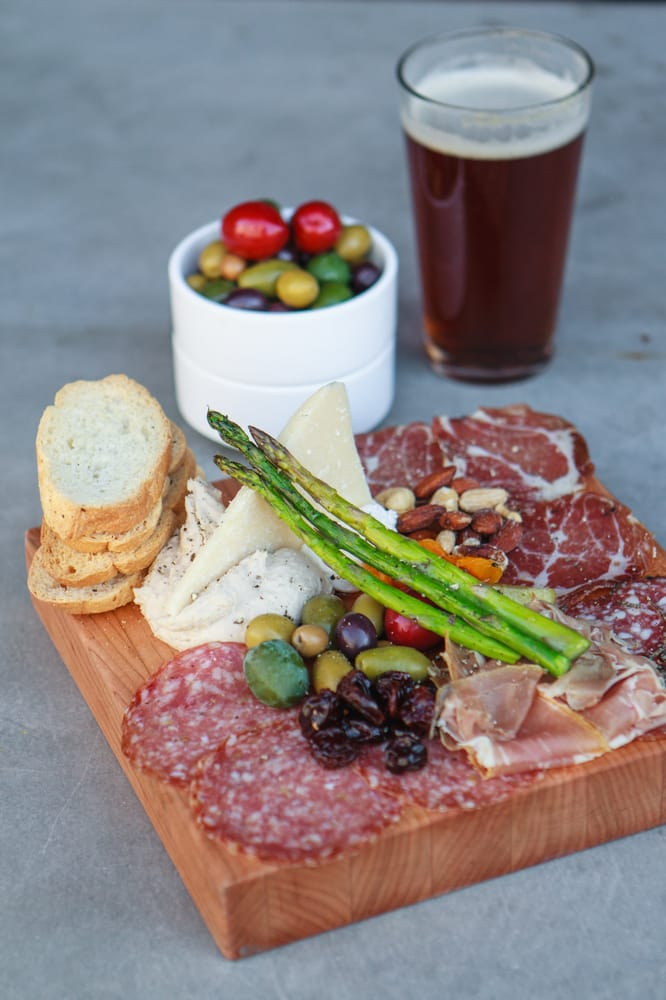

In [215]:
Image(tt2['businesses'][9]['image_url'])

In [50]:
tt2 = request(host, path, api_key, url_params)

Querying https://api.yelp.com/v3/businesses/search ...


In [51]:
tt2

{'businesses': [{'id': 'ujgpePdD8Q-fP1mPFnw0Qw',
   'alias': 'peixoto-coffee-chandler-2',
   'name': 'Peixoto Coffee',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/EQg2GErx3TztENWkYLhnWw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/peixoto-coffee-chandler-2?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 492,
   'categories': [{'alias': 'coffee', 'title': 'Coffee & Tea'},
    {'alias': 'coffeeroasteries', 'title': 'Coffee Roasteries'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.301900334904,
    'longitude': -111.841690018773},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '11 W Boston Suite',
    'address2': '',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['11 W Boston Suite', 'Chandler, AZ 85225']},
   'phone': '+14802752843',
 

In [230]:
    df = pd.DataFrame([{'id': '2T66oHiIi1Ql-j5IhwbGjw',
   'alias': 'wimpys-paradise-chandler',
   'name': "Wimpy's Paradise",
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9MSL6WEYg3a-EZDvQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/wimpys-paradise-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 191,
   'categories': [{'alias': 'burgers', 'title': 'Burgers'},
    {'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'},
    {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.30291, 'longitude': -111.84253},
   'transactions': ['pickup', 'delivery'],
   'price': '$',
   'location': {'address1': '48 S San Marcos Pl',
    'address2': None,
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['48 S San Marcos Pl', 'Chandler, AZ 85225']},
   'phone': '+16026964397',
   'display_phone': '(602) 696-4397',
   'distance': 4274.284178561092},
  {'id': 'lN4wmlhRagSZMF6YlOGNtg',
   'alias': 'julias-mesquite-mexican-and-burgers-chandler',
   'name': "Julia's Mesquite Mexican and Burgers",
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/vJyQ1UAA50_3AOpdTsPIbA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/julias-mesquite-mexican-and-burgers-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 262,
   'categories': [{'alias': 'mexican', 'title': 'Mexican'},
    {'alias': 'burgers', 'title': 'Burgers'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.3378722064868,
    'longitude': -111.842531128219},
   'transactions': ['pickup'],
   'price': '$',
   'location': {'address1': '2160 N Arizona Ave',
    'address2': '',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85225',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['2160 N Arizona Ave', 'Chandler, AZ 85225']},
   'phone': '+14806264585',
   'display_phone': '(480) 626-4585',
   'distance': 7286.203045921925},
  {'id': 'GFoJkebYoK2sigk3H8lUlg',
   'alias': 'twisted-cactus-brew-and-bbq-chandler',
   'name': 'Twisted Cactus Brew & BBQ',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/D9kjXpos6-8M3Ap2CMWq7w/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/twisted-cactus-brew-and-bbq-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 172,
   'categories': [{'alias': 'burgers', 'title': 'Burgers'},
    {'alias': 'pubs', 'title': 'Pubs'},
    {'alias': 'bbq', 'title': 'Barbeque'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.322378, 'longitude': -111.911818},
   'transactions': ['delivery', 'pickup'],
   'price': '$$',
   'location': {'address1': '4080 W Ray Rd',
    'address2': 'Ste 26',
    'address3': None,
    'city': 'Chandler',
    'zip_code': '85226',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['4080 W Ray Rd', 'Ste 26', 'Chandler, AZ 85226']},
   'phone': '+14804914000',
   'display_phone': '(480) 491-4000',
   'distance': 5614.02971036117},
  {'id': 'i5vxtyiHKYnRcJ0p9N7mLw',
   'alias': 'carlo-and-emilies-gourmet-deli-chandler',
   'name': "Carlo & Emilie's Gourmet Deli",
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/x4ck70H63UQwzTeE6UeENw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/carlo-and-emilies-gourmet-deli-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 298,
   'categories': [{'alias': 'delis', 'title': 'Delis'},
    {'alias': 'italian', 'title': 'Italian'},
    {'alias': 'french', 'title': 'French'}],
   'rating': 4.5,
   'coordinates': {'latitude': 33.274753988508,
    'longitude': -111.859773136675},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '2040 S Alma School Rd',
    'address2': 'Ste 12',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85286',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['2040 S Alma School Rd',
     'Ste 12',
     'Chandler, AZ 85286']},
   'phone': '+14807864019',
   'display_phone': '(480) 786-4019',
   'distance': 1903.7356159236977},
  {'id': 'UdEmYOnk2iJDY9lpEPAlJQ',
   'alias': 'floridinos-pizza-and-pasta-chandler',
   'name': "Floridino's Pizza & Pasta",
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/zp7C8wmVfgk3mOGny1X_SQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/floridinos-pizza-and-pasta-chandler?adjust_creative=58k_7ZiGjXyE0vqJ4qKzRQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=58k_7ZiGjXyE0vqJ4qKzRQ',
   'review_count': 432,
   'categories': [{'alias': 'italian', 'title': 'Italian'},
    {'alias': 'pizza', 'title': 'Pizza'}],
   'rating': 4.0,
   'coordinates': {'latitude': 33.3113830747242,
    'longitude': -111.85960385582},
   'transactions': ['delivery'],
   'price': '$',
   'location': {'address1': '590 N Alma School Rd',
    'address2': 'Ste 35',
    'address3': '',
    'city': 'Chandler',
    'zip_code': '85224',
    'country': 'US',
    'state': 'AZ',
    'display_address': ['590 N Alma School Rd',
     'Ste 35',
     'Chandler, AZ 85224']},
   'phone': '+14808128433',
   'display_phone': '(480) 812-8433',
   'distance': 3940.8956387638955}])

In [231]:
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,wimpys-paradise-chandler,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.30291, 'longitude': -111.84253}",(602) 696-4397,4274.284179,2T66oHiIi1Ql-j5IhwbGjw,https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9...,False,"{'address1': '48 S San Marcos Pl', 'address2':...",Wimpy's Paradise,+16026964397,$,4.5,191,"[pickup, delivery]",https://www.yelp.com/biz/wimpys-paradise-chand...
1,julias-mesquite-mexican-and-burgers-chandler,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 33.3378722064868, 'longitude': -1...",(480) 626-4585,7286.203046,lN4wmlhRagSZMF6YlOGNtg,https://s3-media3.fl.yelpcdn.com/bphoto/vJyQ1U...,False,"{'address1': '2160 N Arizona Ave', 'address2':...",Julia's Mesquite Mexican and Burgers,+14806264585,$,4.5,262,[pickup],https://www.yelp.com/biz/julias-mesquite-mexic...
2,twisted-cactus-brew-and-bbq-chandler,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.322378, 'longitude': -111.911818}",(480) 491-4000,5614.029710,GFoJkebYoK2sigk3H8lUlg,https://s3-media1.fl.yelpcdn.com/bphoto/D9kjXp...,False,"{'address1': '4080 W Ray Rd', 'address2': 'Ste...",Twisted Cactus Brew & BBQ,+14804914000,$$,4.5,172,"[delivery, pickup]",https://www.yelp.com/biz/twisted-cactus-brew-a...
3,carlo-and-emilies-gourmet-deli-chandler,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...","{'latitude': 33.274753988508, 'longitude': -11...",(480) 786-4019,1903.735616,i5vxtyiHKYnRcJ0p9N7mLw,https://s3-media4.fl.yelpcdn.com/bphoto/x4ck70...,False,"{'address1': '2040 S Alma School Rd', 'address...",Carlo & Emilie's Gourmet Deli,+14807864019,$$,4.5,298,[],https://www.yelp.com/biz/carlo-and-emilies-gou...
4,floridinos-pizza-and-pasta-chandler,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 33.3113830747242, 'longitude': -1...",(480) 812-8433,3940.895639,UdEmYOnk2iJDY9lpEPAlJQ,https://s3-media3.fl.yelpcdn.com/bphoto/zp7C8w...,False,"{'address1': '590 N Alma School Rd', 'address2...",Floridino's Pizza & Pasta,+14808128433,$,4.0,432,[delivery],https://www.yelp.com/biz/floridinos-pizza-and-...


In [237]:
df.columns

Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')

In [238]:
for index, row in df.iterrows():
   print(row['image_url'], row['name'], row['location']['display_address'])

https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9MSL6WEYg3a-EZDvQ/o.jpg Wimpy's Paradise ['48 S San Marcos Pl', 'Chandler, AZ 85225']
https://s3-media3.fl.yelpcdn.com/bphoto/vJyQ1UAA50_3AOpdTsPIbA/o.jpg Julia's Mesquite Mexican and Burgers ['2160 N Arizona Ave', 'Chandler, AZ 85225']
https://s3-media1.fl.yelpcdn.com/bphoto/D9kjXpos6-8M3Ap2CMWq7w/o.jpg Twisted Cactus Brew & BBQ ['4080 W Ray Rd', 'Ste 26', 'Chandler, AZ 85226']
https://s3-media4.fl.yelpcdn.com/bphoto/x4ck70H63UQwzTeE6UeENw/o.jpg Carlo & Emilie's Gourmet Deli ['2040 S Alma School Rd', 'Ste 12', 'Chandler, AZ 85286']
https://s3-media3.fl.yelpcdn.com/bphoto/zp7C8wmVfgk3mOGny1X_SQ/o.jpg Floridino's Pizza & Pasta ['590 N Alma School Rd', 'Ste 35', 'Chandler, AZ 85224']


In [263]:
df.iloc[0]['display_phone']

'(602) 696-4397'

In [269]:
df['address0'] = ''
df['address1'] = ''
for index, row in df.iterrows():
    if len(row['location']['display_address']) >= 3:
        df['address0'][index] = row['location']['display_address'][0]+', '+row['location']['display_address'][1]
        df['address1'][index] = row['location']['display_address'][-1]
    if len(row['location']['display_address']) == 2:
        df['address0'][index] = row['location']['display_address'][0]
        df['address1'][index] = row['location']['display_address'][-1]

0
1
2
3
4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopy

In [270]:
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,address0,address1
0,wimpys-paradise-chandler,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.30291, 'longitude': -111.84253}",(602) 696-4397,4274.284179,2T66oHiIi1Ql-j5IhwbGjw,https://s3-media3.fl.yelpcdn.com/bphoto/SPBMJ9...,False,"{'address1': '48 S San Marcos Pl', 'address2':...",Wimpy's Paradise,+16026964397,$,4.5,191,"[pickup, delivery]",https://www.yelp.com/biz/wimpys-paradise-chand...,48 S San Marcos Pl,"Chandler, AZ 85225"
1,julias-mesquite-mexican-and-burgers-chandler,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 33.3378722064868, 'longitude': -1...",(480) 626-4585,7286.203046,lN4wmlhRagSZMF6YlOGNtg,https://s3-media3.fl.yelpcdn.com/bphoto/vJyQ1U...,False,"{'address1': '2160 N Arizona Ave', 'address2':...",Julia's Mesquite Mexican and Burgers,+14806264585,$,4.5,262,[pickup],https://www.yelp.com/biz/julias-mesquite-mexic...,2160 N Arizona Ave,"Chandler, AZ 85225"
2,twisted-cactus-brew-and-bbq-chandler,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 33.322378, 'longitude': -111.911818}",(480) 491-4000,5614.029710,GFoJkebYoK2sigk3H8lUlg,https://s3-media1.fl.yelpcdn.com/bphoto/D9kjXp...,False,"{'address1': '4080 W Ray Rd', 'address2': 'Ste...",Twisted Cactus Brew & BBQ,+14804914000,$$,4.5,172,"[delivery, pickup]",https://www.yelp.com/biz/twisted-cactus-brew-a...,"4080 W Ray Rd, Ste 26","Chandler, AZ 85226"
3,carlo-and-emilies-gourmet-deli-chandler,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...","{'latitude': 33.274753988508, 'longitude': -11...",(480) 786-4019,1903.735616,i5vxtyiHKYnRcJ0p9N7mLw,https://s3-media4.fl.yelpcdn.com/bphoto/x4ck70...,False,"{'address1': '2040 S Alma School Rd', 'address...",Carlo & Emilie's Gourmet Deli,+14807864019,$$,4.5,298,[],https://www.yelp.com/biz/carlo-and-emilies-gou...,"2040 S Alma School Rd, Ste 12","Chandler, AZ 85286"
4,floridinos-pizza-and-pasta-chandler,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 33.3113830747242, 'longitude': -1...",(480) 812-8433,3940.895639,UdEmYOnk2iJDY9lpEPAlJQ,https://s3-media3.fl.yelpcdn.com/bphoto/zp7C8w...,False,"{'address1': '590 N Alma School Rd', 'address2...",Floridino's Pizza & Pasta,+14808128433,$,4.0,432,[delivery],https://www.yelp.com/biz/floridinos-pizza-and-...,"590 N Alma School Rd, Ste 35","Chandler, AZ 85224"
